In [142]:
import math
import matplotlib.pyplot as plt
import numpy as np


def calc_expected_mean_r(alpha, r_min, r_max):
    return alpha * r_min / (alpha - 1) * (1-(r_min/r_max)**(alpha - 1)) / (1 - (r_min/r_max)**alpha)


def calc_expected_stdev_r(alpha, r_min, r_max):
    e_x2 = (alpha * r_min**alpha / (1 - (r_min/r_max)**alpha)) * ((r_max**(2-alpha)) - r_min**(2-alpha))/(2-alpha)
    e_x = calc_expected_mean_r(alpha, r_min, r_max)
    
    return np.sqrt(e_x2 - e_x**2)


def inverse_quantile(p, alpha, r_min, r_max):
    return r_min * (1/(1 - p + p * (r_min/r_max)**alpha))**(1/alpha)


def calculate_ci(quantile_alpha, alpha, r_min, r_max):
    return (
        inverse_quantile(quantile_alpha, alpha, r_min, r_max), 
        inverse_quantile(1 - quantile_alpha, alpha, r_min, r_max)
    )


def calculate_quantile(r, alpha, r_min, r_max):
    return (1 - (r_min/r)**alpha) / (1 - (r_min/r_max)**alpha)

In [143]:
calc_expected_mean_r(2, 3, 500)

5.964214711729623

In [158]:
calc_expected_stdev_r(2.1, 3, 100)

np.float64(4.946365471062637)

In [140]:
# This shows that there IS a defined limit of the standard dev as alpha goes to 2
# It is very sensitive to r_max
r_min = 1
r_max = 60000 * np.e**1
alpha = 2.00001

# Derived with Wolfram alpha
# Limit of the stdev as alpha -> 2
limit_ex2 = 2 * r_min**2 * r_max**2 * np.log(r_min/r_max)/(r_min**2 - r_max**2)
limit_ex = calc_expected_mean_r(2, r_min, r_max)
limit_stdev = np.sqrt(limit_ex2 - limit_ex**2)

approx_limit_stdev = calc_expected_stdev_r(alpha, r_min, r_max)

print(limit_stdev)
print(approx_limit_stdev)
print(limit_stdev - approx_limit_stdev)

4.472610952615028
4.4724678080453515
0.00014314456967667866


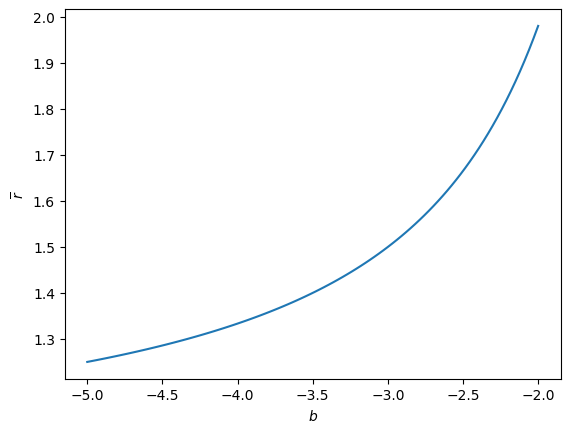

In [4]:
alpha = np.linspace(2.0001, 5.0, num=100)
expected_mean = calc_expected_mean_r(alpha, r_min=1, r_max=100)

plt.plot(
    -alpha,
    expected_mean,
)
plt.xlabel("$b$")
plt.ylabel("$\\overline{r}$")

plt.show()

Text(0, 0.5, '$\\sigma_r$')

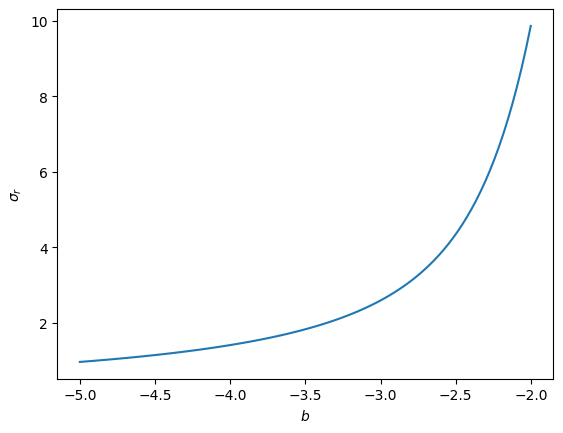

In [40]:
alpha = np.linspace(2.001, 5.0, num=100)
expected_stdev = calc_expected_stdev_r(alpha, r_min=1, r_max=100)

plt.plot(
    -alpha,
    expected_stdev,
)
plt.xlabel("$b$")
plt.ylabel("$\\sigma_r$")

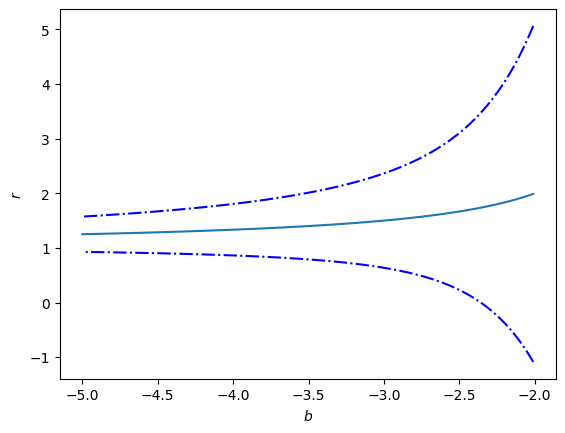

In [30]:
r_min = 1
r_max = 1000

alpha = np.linspace(2.01, 5.0, num=100)
expected_mean = calc_expected_mean_r(alpha, r_min=r_min, r_max=r_max)
expected_stdev = calc_expected_stdev_r(alpha, r_min=r_min, r_max=r_max)

plt.plot(
    -alpha,
    expected_mean,
)

plt.plot(
    -alpha,
    expected_mean - expected_stdev,
    ls="-.",
    c="b"
)

plt.plot(
    -alpha,
    expected_mean + expected_stdev,
    ls="-.",
    c="b"
)

plt.xlabel("$b$")
plt.ylabel("$r$")

plt.show()

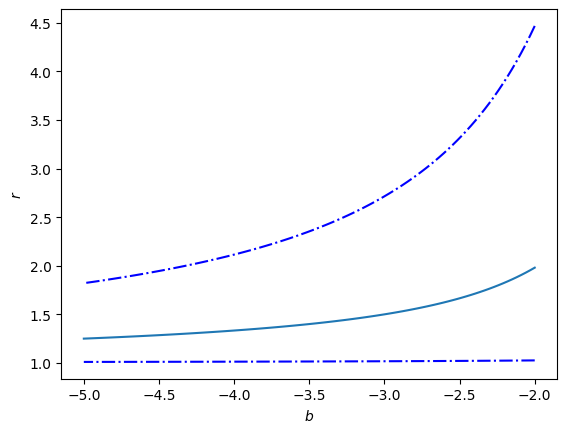

In [32]:
r_min = 1
r_max = 100

alpha = np.linspace(2.0001, 5.0, num=100)
expected_mean = calc_expected_mean_r(alpha, r_min=r_min, r_max=r_max)
low_quantile = inverse_quantile(0.05, alpha, r_min=r_min, r_max=r_max)
high_quantile = inverse_quantile(0.95, alpha, r_min=r_min, r_max=r_max)

plt.plot(
    -alpha,
    expected_mean,
)

plt.plot(
    -alpha,
    low_quantile,
    ls="-.",
    c="b"
)

plt.plot(
    -alpha,
    high_quantile,
    ls="-.",
    c="b"
)

plt.xlabel("$b$")
plt.ylabel("$r$")

plt.show()

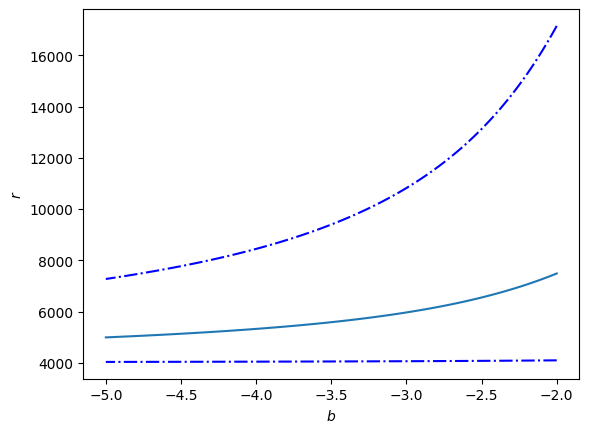

In [20]:
# From Dione
r_min = 3995
r_max = 59630

alpha = np.linspace(2.0001, 5.0, num=100)
expected_mean = calc_expected_mean_r(alpha, r_min=r_min, r_max=r_max)
low_quantile = inverse_quantile(0.05, alpha, r_min=r_min, r_max=r_max)
high_quantile = inverse_quantile(0.95, alpha, r_min=r_min, r_max=r_max)

plt.plot(
    -alpha,
    expected_mean,
)

plt.plot(
    -alpha,
    low_quantile,
    ls="-.",
    c="b"
)

plt.plot(
    -alpha,
    high_quantile,
    ls="-.",
    c="b"
)

plt.xlabel("$b$")
plt.ylabel("$r$")

plt.show()

In [31]:
# From Dione
calculate_ci(0.05, 2.001, 3995, 59630)

(4098.248477946805, 17139.19047212764)